## Building the Model

In [5]:
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.ensemble
import sklearn.preprocessing
import sklearn.grid_search
from utils.analysis_utils import *
pd.options.mode.chained_assignment = None # Eliminates some false warnings

%matplotlib
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

Using matplotlib backend: Qt5Agg


In [2]:
data = pd.read_csv("final_main_table.csv")

### First Attempt: Logistic Regression

The first run we made used logistic regression, and only the similarity features.

Let's see how far that got us:

In [3]:
features = ["topic_sim", "entities_sim", "categories_sim"]
for feature in features:
    data[feature] = sklearn.preprocessing.scale(data[feature])
    
# Splitting to train (80%) and test (20%) sets
train_data, test_data = split_to_test_and_train(data)

train_features_list = [train_data[feature] for feature in features]
test_features_list = [test_data[feature] for feature in features]

# Extracting X and y vectors for train and test
train_points, train_labels = prepare_dataset_for_model(train_features_list, train_data.clicked)
test_points, test_labels = prepare_dataset_for_model(test_features_list, test_data.clicked)

model = sklearn.linear_model.LogisticRegression()
model.fit(train_points, train_labels)

display_probs = model.predict_proba(test_points)[:, 1]
test_data["probability_of_click"] = display_probs  # Error generated at this line can be ignored

# Evaluating the model using 0/1 loss
zero_one_accuracy = accuracy_zero_one_loss(test_data)
print("0/1 Accuracy for Logistic Regression Model: " + str(zero_one_accuracy))

# Evaluating the model using MAP@12 metric
map12_accuracy = MAP12_Accuracy(test_data)
print("MAP@12 Accuracy for Logistic Regression Model: " + str(map12_accuracy))


[LibLinear]

C:\Users\Dean\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0/1 Accuracy for Logistic Regression Model: 0.262509725042
Now calculating MAP@12 accuracy, should take about 5 minutes
MAP@12 Accuracy for Logistic Regression Model: 0.503027275956


### Second Attempt: More Features, Gradient Boosting and Random Forest

This was obviously far from good, as even simple single-feature models could acheive much better results. At this point we came to the realisation we needed a lot more features - so we spent a sizeable amount of time thinking about and generating all the features mentioned above.

We then wanted to check whether logistic regression's performance has improved, and also check whether there are better models we can use. A lot of other teams used gradient boosting and random forests, so we decided to check them as well and compare them to logistic regression. 

C:\Users\Dean\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Dean\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Dean\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


Now checking Logistic Regression
[LibLinear]

C:\Users\Dean\Anaconda3\lib\site-packages\ipykernel\__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Now calculating MAP@12 accuracy, should take about 5 minutes
Now checking Gradient Boosting
      Iter       Train Loss   Remaining Time 
         1           0.9551           13.19m
         2           0.9339           13.23m
         3           0.9168           12.74m
         4           0.9030           12.68m
         5           0.8911           12.40m
         6           0.8812           12.19m
         7           0.8729           11.98m
         8           0.8658           11.94m
         9           0.8601           11.80m
        10           0.8548           11.67m
        20           0.8292           10.09m
        30           0.8209            8.67m
        40           0.8180            7.30m
        50           0.8162            6.03m
        60           0.8152            4.76m
        70           0.8146            3.57m
        80           0.8142            2.37m
        90           0.8139            1.19m
       100           0.8137            0.00s
Now cal

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.6min finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.9s finished
C:\Users\Dean\Anaconda3\lib\site-packages\ipykernel\__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Now calculating MAP@12 accuracy, should take about 5 minutes


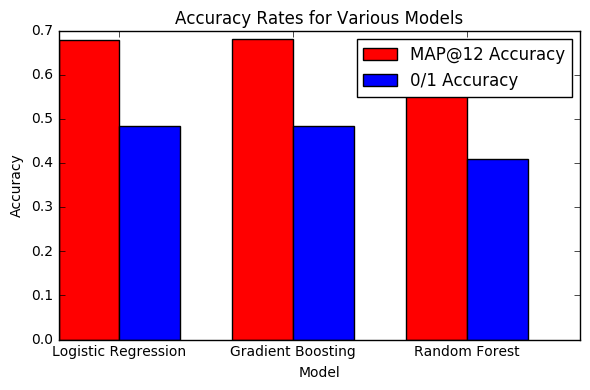

                 Model  MAP@12 Accuracy  0/1 Accuracy
0  Logistic Regression         0.679271      0.483539
1    Gradient Boosting         0.680089      0.484525
2        Random Forest         0.620082      0.408414


In [4]:
features = ["topic_sim", "entities_sim", "categories_sim",
            "is_morning", "is_noon", "is_afternoon", "is_evening", "is_night",
            "is_weekend", "platform_is_mobile", "platform_is_desktop", "platform_is_tablet",
            "clicks_appearances_ratio", "ad_count_per_display", "ads_per_advertiser",
            "ads_per_campaign"]

features_to_scale = ["topic_sim", "entities_sim", "categories_sim",
                     "clicks_appearances_ratio", "ad_count_per_display",
                     "ads_per_advertiser", "ads_per_campaign"]

for feature in features_to_scale:
    data[feature] = data[feature].astype(float)  # Avoids scaling conversion warnings for ints
    data[feature] = sklearn.preprocessing.scale(data[feature])
    
train_features_list = [train_data[feature] for feature in features]
test_features_list = [test_data[feature] for feature in features]

# Extracting X and y vectors for train and test
train_points, train_labels = prepare_dataset_for_model(train_features_list, train_data.clicked)
test_points, test_labels = prepare_dataset_for_model(test_features_list, test_data.clicked)
    
models = [sklearn.linear_model.LogisticRegression(),
         sklearn.ensemble.GradientBoostingClassifier(),
         sklearn.ensemble.RandomForestClassifier()]

model_names = ["Logistic Regression", "Gradient Boosting", "Random Forest"]

map_12_accuracies = np.zeros(shape=3)
zero_one_accuracies = np.zeros(shape=3)

for i in range(len(models)):
    model = models[i]
    print("Now checking " + model_names[i])
    model.fit(train_points, train_labels)
    display_probs = model.predict_proba(test_points)[:, 1]
    test_data["probability_of_click"] = display_probs  # Error generated at this line can be ignored
    zero_one_accuracies[i] = accuracy_zero_one_loss(test_data)
    map_12_accuracies[i] = MAP12_Accuracy(test_data)
    

fig = plt.figure()
plt.bar(range(3), map_12_accuracies, 0.35, color='r', label="MAP@12 Accuracy")
plt.bar(np.array(range(3)) + 0.35, zero_one_accuracies, 0.35, color='b', label="0/1 Accuracy")
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Rates for Various Models')
plt.xticks(np.array(range(3)) + 0.35, ("Logistic Regression", "Gradient Boosting", "Random Forest"))
plt.legend(loc = 4)
plt.tight_layout()
plt.show()
    
acc_frame = pd.DataFrame()
acc_frame["Model"] = model_names
acc_frame["MAP@12 Accuracy"] = map_12_accuracies
acc_frame["0/1 Accuracy"] = zero_one_accuracies

print(acc_frame)


    
    



Now we need to decide which model to work with.
Clearly, random forest is inferior to the other two models, so we decide not to pursue it further.  
Let's see how far we can improve each of the remaining models using cross validation to tune their parameters.

In [13]:
# Using CV to tune LR's C parameter
model = sklearn.linear_model.LogisticRegression(verbose=True)
parameters = {"C": [10**-5, 1, 10, 100, 1000], "penalty": ["l1","l2"]}
cv = sklearn.grid_search.GridSearchCV(model, parameters, verbose=True)
cv.fit(train_points,train_labels)

base_param_grid = cv.grid_scores_
C_values = np.array([10**-5, 1, 10, 100, 1000])
validation_scores = np.zeros(shape=len(base_param_grid))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 10.7min finished


[LibLinear]

C:\Users\Dean\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


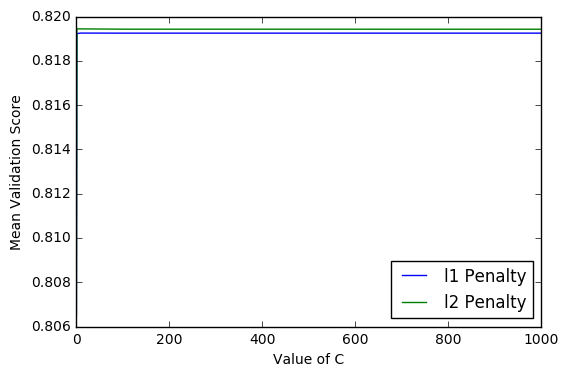

In [23]:
# Plotting the scores
l1_accuracies = []
l2_accuracies = []
for i in range(len(base_param_grid)):
    penalty = base_param_grid[i].parameters['penalty']
    accuracy = base_param_grid[i].mean_validation_score
    if penalty == 'l1':
        l1_accuracies.append(accuracy)
    else:
        l2_accuracies.append(accuracy)
        
fig = plt.figure()
plt.plot(C_values, l1_accuracies, label="l1 Penalty")
plt.plot(C_values, l2_accuracies, label="l2 Penalty")
plt.xlabel("Value of C")
plt.ylabel("Mean Validation Score")
plt.legend(loc = 4)
fig.show()
        

As we can see, no meaningful progress can be made by adjusting the logistic regression parameters. 
Let's try and do the same for gradient boosting.

In [24]:
model = sklearn.ensemble.GradientBoostingClassifier()
parameters = {"max_depth": [2, 3, 4, 5, 6]}
cv = sklearn.grid_search.GridSearchCV(model, parameters, verbose=True)
cv.fit(train_points,train_labels)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
      Iter       Train Loss   Remaining Time 
         1           0.9590            3.22m
         2           0.9407            3.13m
         3           0.9257            3.14m
         4           0.9131            3.09m
         5           0.9028            3.04m
         6           0.8941            2.98m
         7           0.8862            2.95m
         8           0.8798            2.89m
         9           0.8748            2.84m
        10           0.8694            2.82m
        20           0.8419            2.46m
        30           0.8304            2.12m
        40           0.8251            1.80m
        50           0.8219            1.49m
        60           0.8203            1.18m
        70           0.8191           52.94s
        80           0.8182           35.21s
        90           0.8176           17.52s
       100           0.8172            0.00s
      Iter       Train Loss   Remaining

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 128.3min finished


      Iter       Train Loss   Remaining Time 
         1           0.9511           27.79m
         2           0.9276           27.67m
         3           0.9091           27.62m
         4           0.8942           27.21m
         5           0.8819           27.03m
         6           0.8717           26.82m
         7           0.8633           26.47m
         8           0.8561           26.25m
         9           0.8501           25.90m
        10           0.8450           25.67m
        20           0.8209           22.82m
        30           0.8149           19.93m
        40           0.8130           16.95m
        50           0.8122           13.90m
        60           0.8117           10.88m
        70           0.8113            7.97m
        80           0.8110            5.23m
        90           0.8107            2.56m
       100           0.8104            0.00s


GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0,
              verbose=True, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6]}, pre_dispatch='2*n_jobs',
       refit=True, scoring=None, verbose=True)

In [25]:
# Plotting the scores
base_param_grid = cv.grid_scores_
max_depth_values = np.array([2, 3, 4, 5, 6])
validation_scores = np.zeros(shape=len(base_param_grid))
for i in range(5):
    validation_scores[i] = base_param_grid[i].mean_validation_score

C:\Users\Dean\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


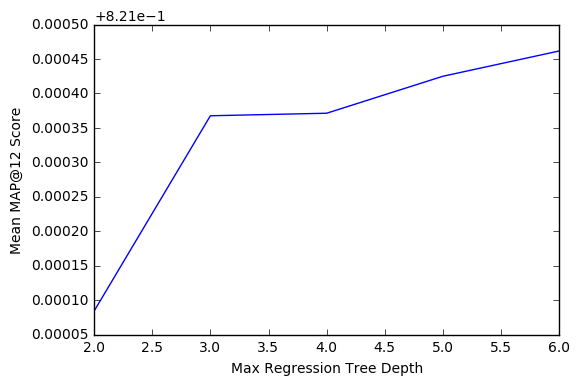

In [26]:
fig = plt.figure()
plt.plot(max_depth_values, validation_scores)
plt.xlabel("Max Regression Tree Depth")
plt.ylabel("Mean MAP@12 Score")
fig.show()

It seems enlarging the maximum depth for the regression trees does make a difference. Using a value of 6 already causes the model fitting to take about 30 minutes, so increasing it further will probably cause the model fitting to take even longer.

Now let's perform the final test for our model. Coincidentally, the number of displays in the data is divisible by 7, so we can perform 7-fold cross validation to make final evaluation of our model. 

In [33]:
displays = data.display_id.unique()
np.random.RandomState(0).shuffle(displays)

# Performing 7-fold CV
zero_one_accuracies = np.zeros(shape=7)
map_12_accuracies = np.zeros(shape=7)

model = cv.best_estimator_ # Using the best value for max depth we found through CV earlier

for i in range(7):
    print("Now working on fold number " + str(i))
    test_displays = displays[i*75333:(i+1)*75333]
    if i == 0:
        train_displays = displays[75333:]
    elif i == 6:
        train_displays = displays[:6*75333]
    else:
        train_displays = np.concatenate((displays[:i*75333], displays[(i+1)*75333:]))

    train_df = data[data.display_id.isin(train_displays)]
    test_df = data[data.display_id.isin(test_displays)]

    train_features_list = [train_df[feature] for feature in features]
    test_features_list = [test_df[feature] for feature in features]

    # Extracting X and y vectors for train and test
    train_points, train_labels = prepare_dataset_for_model(train_features_list, train_df.clicked)
    test_points, test_labels = prepare_dataset_for_model(test_features_list, test_df.clicked)

    model.fit(train_points, train_labels)

    display_probs = model.predict_proba(test_points)[:, 1]
    test_df["probability_of_click"] = display_probs  # Error generated at this line can be ignored

    # Evaluating the model using 0/1 loss
    zero_one_accuracy = accuracy_zero_one_loss(test_df)
    zero_one_accuracies[i] = zero_one_accuracy
    print("0/1 Accuracy for Gradient Boosting Algorithm: " + str(zero_one_accuracy))

    # Evaluating the model using MAP@12 metric
    map12_accuracy = MAP12_Accuracy(test_df)
    map_12_accuracies[i] = map12_accuracy
    print("MAP@12 Accuracy for Gradient Boosting Algorithm: " + str(map12_accuracy))

print("Mean 0-1 Accuracy: " + str(zero_one_accuracies.mean()))
print("Mean Map@12 Accuracy: " + str(map_12_accuracies.mean()))



Now working on fold number 0
      Iter       Train Loss   Remaining Time 
         1           0.9513           36.03m
         2           0.9278           39.22m
         3           0.9093           39.88m
         4           0.8943           41.50m
         5           0.8821           38.25m
         6           0.8719           38.82m
         7           0.8634           38.62m
         8           0.8563           37.24m
         9           0.8502           36.96m
        10           0.8451           36.28m
        20           0.8210           31.62m
        30           0.8151           27.96m
        40           0.8132           23.70m
        50           0.8125           19.92m
        60           0.8119           15.78m
        70           0.8115           11.68m
        80           0.8112            7.90m
        90           0.8110            3.82m
       100           0.8107            0.00s


C:\Users\Dean\Anaconda3\lib\site-packages\ipykernel\__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0/1 Accuracy for Gradient Boosting Algorithm: 0.485099491591
Now calculating MAP@12 accuracy, should take about 5 minutes
MAP@12 Accuracy for Gradient Boosting Algorithm: 0.680912652584
Now working on fold number 1
      Iter       Train Loss   Remaining Time 
         1           0.9511           43.66m
         2           0.9276           48.09m
         3           0.9090           50.52m
         4           0.8940           52.45m
         5           0.8818           49.44m
         6           0.8716           46.59m
         7           0.8632           44.63m
         8           0.8560           43.16m
         9           0.8500           42.01m
        10           0.8449           40.72m
        20           0.8208           34.76m
        30           0.8148           28.64m
        40           0.8130           23.92m
        50           0.8122           19.28m
        60           0.8116           15.04m
        70           0.8112           10.96m
        80         

Final MAP@12 Score: 0.68042 (+/- 0.00141)


C:\Users\Dean\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


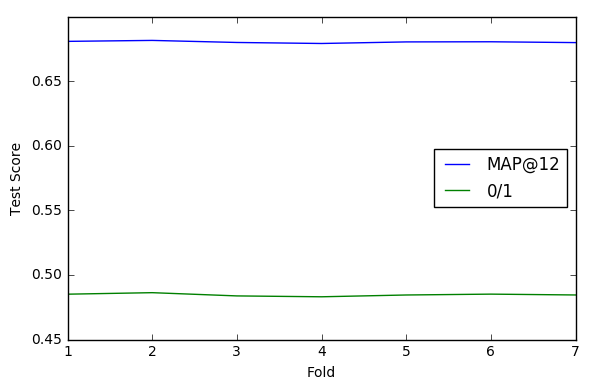

In [40]:
fig = plt.figure()
plt.plot(range(1,8), map_12_accuracies, label="MAP@12")
plt.plot(range(1,8), zero_one_accuracies, label="0/1")
plt.xlabel("Fold")
plt.ylabel("Test Score")
plt.legend(loc = 7)
plt.tight_layout()
fig.show()

print("Final MAP@12 Score: %0.5f (+/- %0.5f)" % (map_12_accuracies.mean(), map_12_accuracies.std() * 2))

As we can see in the graph and in the accuracy printout, the model we managed to build is quite stable - the score hardly changes for the different folds.

Our model acheives a CV score of 0.68042. For comparison, the top team got a score of 0.70145, and the 50th best got a score of 0.67945. 